In [1]:
#import dataframe libraries, mathematics libraries
import pandas as pd #this library contains functions which can manipulate dataframes. 
import numpy as np #this library contains functions which deal with mathematical operations and functions.
import math
import re #importing re for regex

#visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns 

#preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# For Regression Models
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor  
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA 

c:\Users\UKHSM003\Anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
#importing file
schdule = pd.read_csv('joined_TASK_RSRC_WBS_with pivot table on total time difference.csv')

schdule.columns

Index(['%F', 'task_id', 'proj_id', 'wbs_id', 'clndr_id', 'phys_complete_pct',
       'rev_fdbk_flag', 'lock_plan_flag', 'auto_compute_act_flag',
       'complete_pct_type',
       ...
       'ev_etc_compute_type', 'plan_open_state', 'late time difference',
       'act time difference', 'early time difference', 're time difference',
       'target time difference', 'rem time difference', 'Unnamed: 112',
       'Unnamed: 113'],
      dtype='object', length=114)

In [4]:
schdule = schdule.drop(columns=['cstr_date','act_start_date','act_end_date','expect_end_date','cstr_type',
                                'suspend_date','resume_date','float_path','float_path_order',
                                'cstr_date2','cstr_type2','act_this_per_work_qty','act_this_per_equip_qty',
                                'external_early_start_date','external_late_end_date','create_user','update_user',
                                'role_id','shift_id','user_id','pobs_id','email_addr','employee_code','office_phone',
                                'other_phone','rsrc_title_name','def_qty_per_hr','cost_qty_type','ot_factor',
                                'unit_id','rsrc_notes','load_tasks_flag','level_flag','last_checksum','obs_id','phase_id',
                                'ev_user_pct','ev_etc_user_value','orig_cost','indep_remain_total_cost','ann_dscnt_rate_pct',
                                'dscnt_period_type','indep_remain_work_qty','anticip_start_date','anticip_end_date',
                                'ev_compute_type','ev_etc_compute_type','plan_open_state','act time difference',
                                'Unnamed: 112','Unnamed: 113','tmpl_guid'],axis=1)


In [5]:
schdule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5608 entries, 0 to 5607
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   %F                      5608 non-null   object 
 1   task_id                 5608 non-null   int64  
 2   proj_id                 5608 non-null   int64  
 3   wbs_id                  5608 non-null   int64  
 4   clndr_id                5608 non-null   int64  
 5   phys_complete_pct       5608 non-null   int64  
 6   rev_fdbk_flag           5608 non-null   object 
 7   lock_plan_flag          5608 non-null   object 
 8   auto_compute_act_flag   5608 non-null   object 
 9   complete_pct_type       5608 non-null   object 
 10  task_type               5608 non-null   object 
 11  duration_type           5608 non-null   object 
 12  status_code             5608 non-null   object 
 13  task_code               5608 non-null   object 
 14  task_name               5608 non-null   

In [6]:
schdule.dropna(subset = ['rsrc_id', 'parent_rsrc_id','guid'], how='any', inplace=True)

In [7]:
schdule.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4541 entries, 0 to 5607
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   %F                      4541 non-null   object 
 1   task_id                 4541 non-null   int64  
 2   proj_id                 4541 non-null   int64  
 3   wbs_id                  4541 non-null   int64  
 4   clndr_id                4541 non-null   int64  
 5   phys_complete_pct       4541 non-null   int64  
 6   rev_fdbk_flag           4541 non-null   object 
 7   lock_plan_flag          4541 non-null   object 
 8   auto_compute_act_flag   4541 non-null   object 
 9   complete_pct_type       4541 non-null   object 
 10  task_type               4541 non-null   object 
 11  duration_type           4541 non-null   object 
 12  status_code             4541 non-null   object 
 13  task_code               4541 non-null   object 
 14  task_name               4541 non-null   

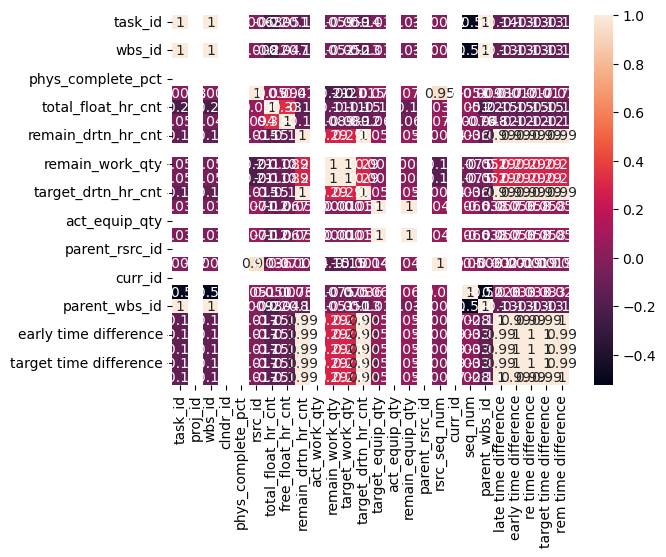

In [8]:
#Heatmap matrix
correlations_matrix = schdule.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [9]:
#X/y split

#separate the features from the target column
y = schdule[['remain_work_qty']]
X = schdule.drop(columns = ['remain_work_qty','target_work_qty'], axis = 1)

add feature selection technique

In [10]:
# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Encoding categorical variables and scaling numerical features
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

# Dimensionality Reduction
from sklearn.decomposition import PCA  # Principal Component Analysis for feature reduction

# Feature Selection
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest  # Feature selection techniques

# Ensemble Learning Models
from sklearn.ensemble import RandomForestClassifier  # Used for feature importance in tree-based selection

# Recursive Feature Elimination
from sklearn.feature_selection import RFE  # Used for recursive feature elimination


In [11]:
y = schdule[['remain_work_qty']]
y=np.array(y).flatten()
X = schdule.drop(columns = ['remain_work_qty','target_work_qty'], axis = 1)
# Identify categorical & numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Encode categorical features only, leaving numerical features unchanged
X_encoded = X.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])  # Encode categorical features
    label_encoders[col] = le  # Store encoders for reference

# Standardise numerical features (needed for RFE but not for tree-based methods)
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

# Now X_encoded contains both numerical and categorical features correctly transformed


# Tree-Based Feature Importance
model_tree = RandomForestClassifier(n_estimators=100, random_state=42)
model_tree.fit(X_encoded, y)

# Create DataFrame with feature importances
tree_importance = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': model_tree.feature_importances_})
tree_importance = tree_importance.sort_values(by='Importance', ascending=False)

print("\nTree-Based Feature Importance:")
print(tree_importance.head(20))



Tree-Based Feature Importance:
                Feature  Importance
14            task_name    0.079922
16   total_float_hr_cnt    0.049046
13            task_code    0.045868
53             wbs_name    0.045058
49              seq_num    0.043930
33    rem_late_end_date    0.035659
52       wbs_short_name    0.035417
25        late_end_date    0.034401
32  rem_late_start_date    0.034161
24      late_start_date    0.033989
29           reend_date    0.032129
30    target_start_date    0.032031
28         restart_date    0.032004
26     early_start_date    0.031999
1               task_id    0.031778
31      target_end_date    0.031128
27       early_end_date    0.030907
3                wbs_id    0.028816
54        parent_wbs_id    0.026465
35                 guid    0.026221


In [12]:
selected_features_tree = tree_importance.iloc[:, 0].head(20).values.tolist()
selected_features_tree

['task_name',
 'total_float_hr_cnt',
 'task_code',
 'wbs_name',
 'seq_num',
 'rem_late_end_date',
 'wbs_short_name',
 'late_end_date',
 'rem_late_start_date',
 'late_start_date',
 'reend_date',
 'target_start_date',
 'restart_date',
 'early_start_date',
 'task_id',
 'target_end_date',
 'early_end_date',
 'wbs_id',
 'parent_wbs_id',
 'guid']

In [13]:
y = schdule[['remain_work_qty']]
y=np.array(y).flatten()
X = schdule[['task_name',
 'total_float_hr_cnt',
 'task_code',
 'wbs_name',
 'seq_num',
 'rem_late_end_date',
 'wbs_short_name',
 'late_end_date',
 'rem_late_start_date',
 'late_start_date',
 'reend_date',
 'target_start_date',
 'restart_date',
 'early_start_date',
 'task_id',
 'target_end_date',
 'early_end_date',
 'wbs_id',
 'parent_wbs_id',
 'guid']]

In [14]:

X=X.reset_index(drop = True)

In [15]:
display(X)
display(X.info())

,task_name,total_float_hr_cnt,task_code,wbs_name,seq_num,rem_late_end_date,wbs_short_name,late_end_date,rem_late_start_date,late_start_date,reend_date,target_start_date,restart_date,early_start_date,task_id,target_end_date,early_end_date,wbs_id,parent_wbs_id,guid
0,"Submission & Clearance of Punch list,Final Te...",0,DUKHHANP03GNACTC9000,PACKAGE-3,43370,18/09/2014 17:00,L45,18/09/2014 17:00,16/08/2014 08:00,16/08/2014 08:00,18/09/2014 17:00,16/08/2014 08:00,16/08/2014 08:00,16/08/2014 08:00,499287,18/09/2014 17:00,18/09/2014 17:00,124256,124255,2u4XDsnBS+KqRni2Wvb/vg
1,"Submission & Clearance Punch list,Final Testi...",0,DUKHHANP03GNELTC9010,PACKAGE-3,43370,18/09/2014 17:00,L45,18/09/2014 17:00,16/08/2014 08:00,16/08/2014 08:00,18/09/2014 17:00,16/08/2014 08:00,16/08/2014 08:00,16/08/2014 08:00,499288,18/09/2014 17:00,18/09/2014 17:00,124256,124255,s2ElMOAyTjifQRHGgVQpAg
2,Submission & Approval of As-Built Drawings & O...,0,DUKHHANP03GNAB009015,PACKAGE-3,43370,30/09/2014 17:00,L45,30/09/2014 17:00,08/09/2014 08:00,08/09/2014 08:00,30/09/2014 17:00,08/09/2014 08:00,08/09/2014 08:00,08/09/2014 08:00,499289,30/09/2014 17:00,30/09/2014 17:00,124256,124255,QNW26tBXSIO/L+hOEoFDoA
3,Demobilization & Handing Over,0,DUKHHANP03GNDM009020,PACKAGE-3,43370,30/11/2014 17:00,L45,30/11/2014 17:00,20/09/2014 08:00,20/09/2014 08:00,30/11/2014 17:00,20/09/2014 08:00,20/09/2014 08:00,20/09/2014 08:00,499290,30/11/2014 17:00,30/11/2014 17:00,124256,124255,jV3cA4nYTAGA2eek61O7pw
4,"Submission & Clearance of Punch list, Final T...",0,DUKHHANP03GNPLTC9005,PACKAGE-3,43370,18/09/2014 17:00,L45,18/09/2014 17:00,16/08/2014 08:00,16/08/2014 08:00,18/09/2014 17:00,16/08/2014 08:00,16/08/2014 08:00,16/08/2014 08:00,499291,18/09/2014 17:00,18/09/2014 17:00,124256,124255,qIt0gbX0RWyrzriWK/md4w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,Block work,416,DUKHCONP1AZ4ARRF3600,ROOF,31190,29/04/2014 17:00,20,29/04/2014 17:00,07/04/2014 08:00,07/04/2014 08:00,27/02/2014 17:00,04/02/2014 08:00,04/02/2014 08:00,04/02/2014 08:00,504890,27/02/2014 17:00,27/02/2014 17:00,125571,125568,9w1yOHhUSH2dGkCWayPjtw
4537,Plastering work,416,DUKHCONP1AZ4ARRF3605,ROOF,31190,07/05/2014 17:00,20,07/05/2014 17:00,15/04/2014 08:00,15/04/2014 08:00,08/03/2014 17:00,13/02/2014 08:00,13/02/2014 08:00,13/02/2014 08:00,504891,08/03/2014 17:00,08/03/2014 17:00,125571,125568,JUM5uufKQo+7tjEBVHom8Q
4538,Flooring screed,456,DUKHCONP1AZ4ARRF3610,ROOF,31190,21/05/2014 17:00,20,21/05/2014 17:00,05/05/2014 08:00,05/05/2014 08:00,16/03/2014 17:00,27/02/2014 08:00,27/02/2014 08:00,27/02/2014 08:00,504892,16/03/2014 17:00,16/03/2014 17:00,125571,125568,YkJ8651NRQy9BF7WUKCb1Q
4539,Painting -Storage area,456,DUKHCONP1AZ4ARRF3695,ROOF,31190,04/06/2014 17:00,20,04/06/2014 17:00,13/05/2014 08:00,13/05/2014 08:00,30/03/2014 17:00,08/03/2014 08:00,08/03/2014 08:00,08/03/2014 08:00,504893,30/03/2014 17:00,30/03/2014 17:00,125571,125568,RefP4vVpQyi1lc3Qb9BJKQ


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4541 entries, 0 to 4540
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   task_name            4541 non-null   object
 1   total_float_hr_cnt   4541 non-null   int64 
 2   task_code            4541 non-null   object
 3   wbs_name             4541 non-null   object
 4   seq_num              4541 non-null   int64 
 5   rem_late_end_date    4541 non-null   object
 6   wbs_short_name       4541 non-null   object
 7   late_end_date        4541 non-null   object
 8   rem_late_start_date  4541 non-null   object
 9   late_start_date      4541 non-null   object
 10  reend_date           4541 non-null   object
 11  target_start_date    4541 non-null   object
 12  restart_date         4541 non-null   object
 13  early_start_date     4541 non-null   object
 14  task_id              4541 non-null   int64 
 15  target_end_date      4541 non-null   object
 16  early_

None

In [16]:
# Initial split to create training and temp sets (temp will later be split into test and validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp (test/val), 42 gives the same dataset to everyone, and gives us a way of controlling random - "True control random"

# Split the temp set into validation and test sets (50-50 split of the 30%, so 15% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# X_train, y_train: 70% of data
# X_val, y_val: 15% of data
# X_test, y_test: 15% of data

In [17]:
##############################################################################
#splitting X values in to Categoric and Numerical data

numerical=[
'total_float_hr_cnt','seq_num','task_id']
categorical = ['task_name',
 'task_code',
 'wbs_name',
 'wbs_short_name',
 'wbs_id',
 'parent_wbs_id',
 'guid']

###############################################################################
#associating numerical and categorical data to train, test and validate

#if possible, we want to hand-pick our columns - depending on the number of columns we have
#split train data
X_train_numerical = X_train[numerical]
X_train_categorical = X_train[categorical]

#split validation data
X_val_numerical = X_val[numerical]
X_val_categorical = X_val[categorical]

#split test data
X_test_numerical = X_test[numerical]
X_test_categorical = X_test[categorical]

In [18]:
############################################################################
#dealing with Numerical data using MinMax scaler (Normalisation)

#Fit ONLY the train set.
MinMaxtransformer = MinMaxScaler().fit(X_train_numerical)

#Train
X_train_normalized = MinMaxtransformer.transform(X_train_numerical)
X_train_minmax = pd.DataFrame(X_train_normalized,columns=X_train_numerical.columns)
#X_train_minmax.head()

#Validation
X_val_normalized = MinMaxtransformer.transform(X_val_numerical)
X_val_minmax = pd.DataFrame(X_val_normalized,columns=X_val_numerical.columns)
#X_val_minmax.head()

#Test
X_test_normalized = MinMaxtransformer.transform(X_test_numerical)
X_test_minmax = pd.DataFrame(X_test_normalized,columns=X_test_numerical.columns)
#X_test_minmax.head()

In [19]:
#############################################################################
#dealing with categoric data using ONEHot encoding

#Separate the categoricals to one hot and ordinal
#OneHot Encoding
X_train_categorical_ohe = X_train_categorical[['task_name',
 'task_code',
 'wbs_name',
 'wbs_short_name',
 'wbs_id',
 'parent_wbs_id',
 'guid']]
X_val_categorical_ohe = X_val_categorical[['task_name',
 'task_code',
 'wbs_name',
 'wbs_short_name',
 'wbs_id',
 'parent_wbs_id',
 'guid']]
X_test_categorical_ohe = X_test_categorical[['task_name',
 'task_code',
 'wbs_name',
 'wbs_short_name',
 'wbs_id',
 'parent_wbs_id',
 'guid']]


In [20]:
#Fit ONLY the train set. 
#from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', drop='first').fit(X_train_categorical_ohe)
#drop='first' allows one column less to pass through dataframe - Without affecting rest of data as info is still there
# I had to use handle_unknown='ignore' to by pass any values new unique values which are found in the val and test dataset but were not found in the train dataset





In [21]:
# Train
encoded_for_p_train = encoder.transform(X_train_categorical_ohe).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_categorical_ohe.columns)
X_train_ohe = pd.DataFrame(encoded_for_p_train, columns=cols)

# Val
encoded_for_p_val = encoder.transform(X_val_categorical_ohe).toarray()
cols = encoder.get_feature_names_out(input_features=X_val_categorical_ohe.columns)
X_val_ohe = pd.DataFrame(encoded_for_p_val, columns=cols)

# Test
encoded_for_p_test = encoder.transform(X_test_categorical_ohe).toarray()
cols = encoder.get_feature_names_out(input_features=X_test_categorical_ohe.columns)
X_test_ohe = pd.DataFrame(encoded_for_p_test, columns=cols)

c:\Users\UKHSM003\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\UKHSM003\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [22]:
X_train_ohe.shape

(3178, 7712)

In [23]:
y_train.shape

(3178,)

In [24]:
#############################################################################

#Reset Indices in Train
X_train_ohe = X_train_ohe.reset_index(drop = True)
#Reset Indices in Validation
X_val_ohe = X_val_ohe.reset_index(drop = True)
#Reset Indices in Test
X_test_ohe = X_test_ohe.reset_index(drop = True)

###Reset Indices###
X_train_minmax = X_train_minmax.reset_index(drop = True)
X_val_minmax = X_val_minmax.reset_index(drop = True)
X_test_minmax = X_test_minmax.reset_index(drop = True)

#Train
X_train_scaled_minmax = pd.concat([X_train_minmax,X_train_ohe], axis = 1)

#Validation
X_val_scaled_minmax = pd.concat([X_val_minmax,X_val_ohe], axis = 1)

#Test
X_test_scaled_minmax = pd.concat([X_test_minmax,X_test_ohe], axis = 1)

y_train = pd.Series(y_train).reset_index(drop=True)
y_val = pd.Series(y_val).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)


In [25]:
rfr = RandomForestRegressor(n_estimators=20, random_state=42)
rfr

RandomForestRegressor(n_estimators=20, random_state=42)

In [26]:
rfr.fit(X_train_scaled_minmax,y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [27]:
y_test_pred = rfr.predict(X_test_scaled_minmax)

y_test_pred

array([3.379500e+02, 1.408205e+04, 2.072000e+02, 7.920000e+01,
       3.636500e+02, 4.120200e+03, 2.430500e+02, 1.642000e+02,
       5.129000e+02, 1.850000e+01, 4.425000e+01, 9.523000e+02,
       8.390000e+01, 8.590000e+01, 7.241000e+02, 1.966500e+02,
       1.448400e+03, 2.095000e+02, 1.152500e+02, 1.451000e+02,
       2.735500e+02, 2.262000e+02, 1.833000e+02, 4.601000e+02,
       1.289850e+03, 2.890500e+02, 3.591100e+03, 3.000000e+03,
       1.396000e+03, 2.085000e+02, 2.044000e+02, 1.716100e+03,
       1.241950e+03, 1.141000e+03, 1.515000e+02, 7.087500e+02,
       6.129500e+02, 3.624000e+02, 2.817500e+02, 2.262000e+02,
       5.184000e+02, 4.597500e+02, 1.857000e+02, 8.817500e+02,
       9.710000e+02, 3.778550e+03, 1.249900e+03, 1.343185e+04,
       7.858000e+02, 7.314000e+02, 1.834000e+02, 1.663100e+03,
       3.990000e+01, 3.127000e+02, 2.500750e+03, 2.647000e+02,
       3.598950e+03, 1.861000e+02, 3.332000e+02, 7.763500e+02,
       9.434000e+02, 1.527000e+02, 1.862000e+02, 3.3846

In [28]:
#R2 Score
train_r2 = rfr.score(X_train_scaled_minmax, y_train)
val_r2 = rfr.score(X_test_scaled_minmax, y_test)
print (f'Train R2: {train_r2} \nValidation R2: {val_r2}')

Train R2: 0.9914647957246281 
Validation R2: 0.9010785141293879


In [29]:
import pickle

In [31]:
#pickle scalers and encoders

# File name to save the model
filename = 'rfr_remain_work_qty.p'
# Save (pickle) the Voting Classifier
pickle.dump(rfr, open(filename, 'wb')) #wb - write binary, for saving the model
print(f"Model successfully saved as {filename}.")

#Encoder
ohe_pickle_file = "OHE_census.pkl"
with open(ohe_pickle_file, "wb") as file:  # 'wb' mode for writing in binary
    pickle.dump(encoder, file)
    

  
#MinMaxtransformer
MinMaxtransformer_pickle_file = "MinMaxtransformer.pkl"
with open(MinMaxtransformer_pickle_file, "wb") as file:  # 'wb' mode for writing in binary
    pickle.dump(MinMaxtransformer, file)
    
    

Model successfully saved as rfr_remain_work_qty.p.
